In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

from langevin.simulation import run_langevin_simulation
from langevin.analysis import compute_ngp
from langevin.fitting import VFT_gamma

In [14]:
#simulations parameters
dt = 1e-3
n_particles = 10
t_max = 100.
n_steps = int(t_max/dt)
m=1.0
gamma_l = 1.
kB=1.
tau = 1
T_0 = 0.1

In [15]:
alpha2_ = []
time_lags_ = []
T_ = np.arange(0.12,0.21,0.01)

for i, T in enumerate(T_):
    start_ = time.time()
    
    gamma_g = VFT_gamma(T, T_0=T_0)

    # Run simulation
    positions, gamma_values, velocities = run_langevin_simulation(
        T=T,tau=tau, n_steps=n_steps,n_particles=n_particles,dt=dt,
        gamma_l=gamma_l,gamma_g=gamma_g,m=m,
        kB=kB,seed=2)
    
    # Compute alpha2 using regular method
    time_lags, alpha2 = compute_ngp(positions)

    # Store results
    alpha2_.append(alpha2)
    time_lags_.append(time_lags)

    end_ = time.time()
    print(f"T = {T:.3f} | {end_ - start_:.2f} seconds")

T = 0.120 | 2.97 seconds
T = 0.130 | 2.93 seconds
T = 0.140 | 2.92 seconds
T = 0.150 | 2.87 seconds
T = 0.160 | 2.91 seconds
T = 0.170 | 2.94 seconds
T = 0.180 | 3.04 seconds
T = 0.190 | 2.98 seconds
T = 0.200 | 3.02 seconds


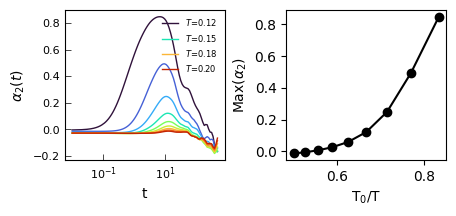

In [16]:
plt.figure(figsize=(4.5, 2.1))
plt.subplot(1,2,1)
colors = plt.cm.turbo(np.linspace(0, 0.9, len(T_)))
a0 = np.zeros(len(T_))
for i in range(len(T_)):
    time_lags = np.array(time_lags_[i])
    alpha2_t = np.array(alpha2_[i])
    a0[i] = max(alpha2_t)
    
    if (i % 3== 0) or i == len(T_) - 1:
        plt.plot(time_lags, alpha2_t, '-', c=colors[i], alpha=1, label=fr'$T$={T_[i]:.2f}', lw=1)
    else:
        plt.plot(time_lags, alpha2_t, '-', c=colors[i], alpha=1, lw=1)

plt.xlabel("t", fontsize=10)
plt.ylabel(r'$\alpha_2(t)$', fontsize=10)
plt.xscale('log')
#plt.ylim(-0.05, 3)
plt.legend(frameon=False, fontsize=6, loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=8, direction='in', length=4, width=0.5)
plt.tick_params(axis='both', which='minor', labelsize=8, direction='in', length=2, width=0.5)
#plt.xticks(np.logspace(-1, 3, 6))

plt.subplot(1,2,2)
plt.plot(T_0/T_,a0,'-o',c='black')
plt.xlabel(r"T$_0$/T", fontsize=10)
plt.ylabel(r'Max($\alpha_2$)', fontsize=10)


plt.tight_layout(pad=0.5)
plt.savefig('figs/Fig_NGP.pdf', dpi=300)
plt.show()